# 1. Explore this dataset using what you have learned in data preprocessing and data visualization 

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


df = pd.read_csv(r'C:\Users\abdel\Downloads\kc_house_data (1).csv')

print(df.head())

           id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900         3       1.00         1180      5650     1.0   
1  6414100192  538000         3       2.25         2570      7242     2.0   
2  5631500400  180000         2       1.00          770     10000     1.0   
3  2487200875  604000         4       3.00         1960      5000     1.0   
4  1954400510  510000         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot1

In [11]:
print(df.describe())
print(df.isnull().sum())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

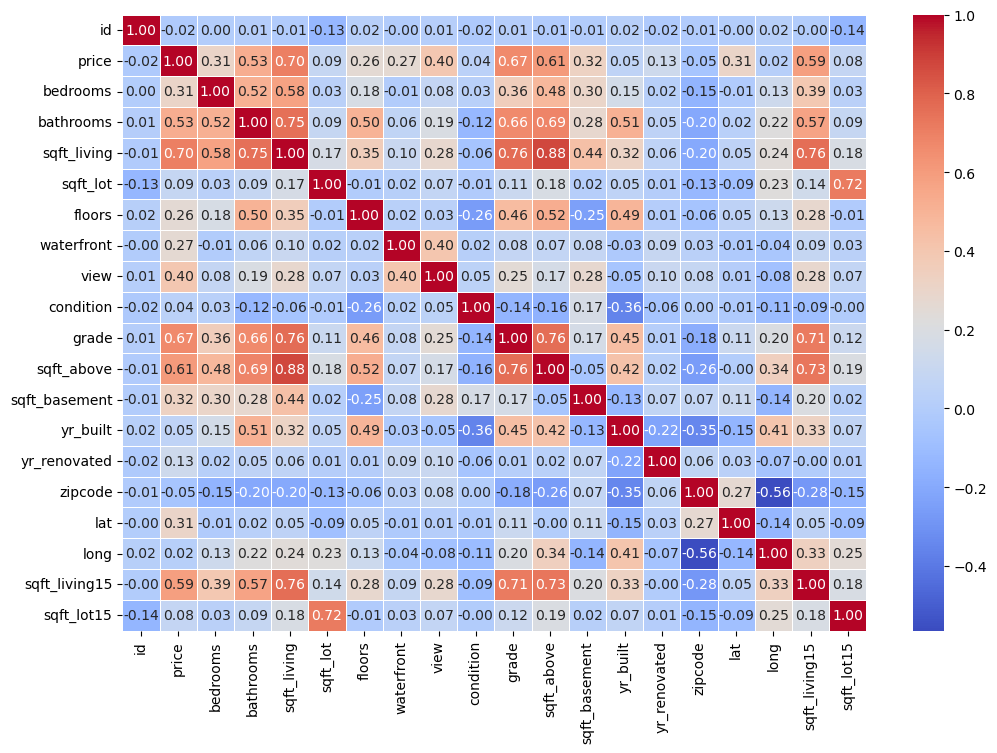

In [72]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

C:\Users\abdel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


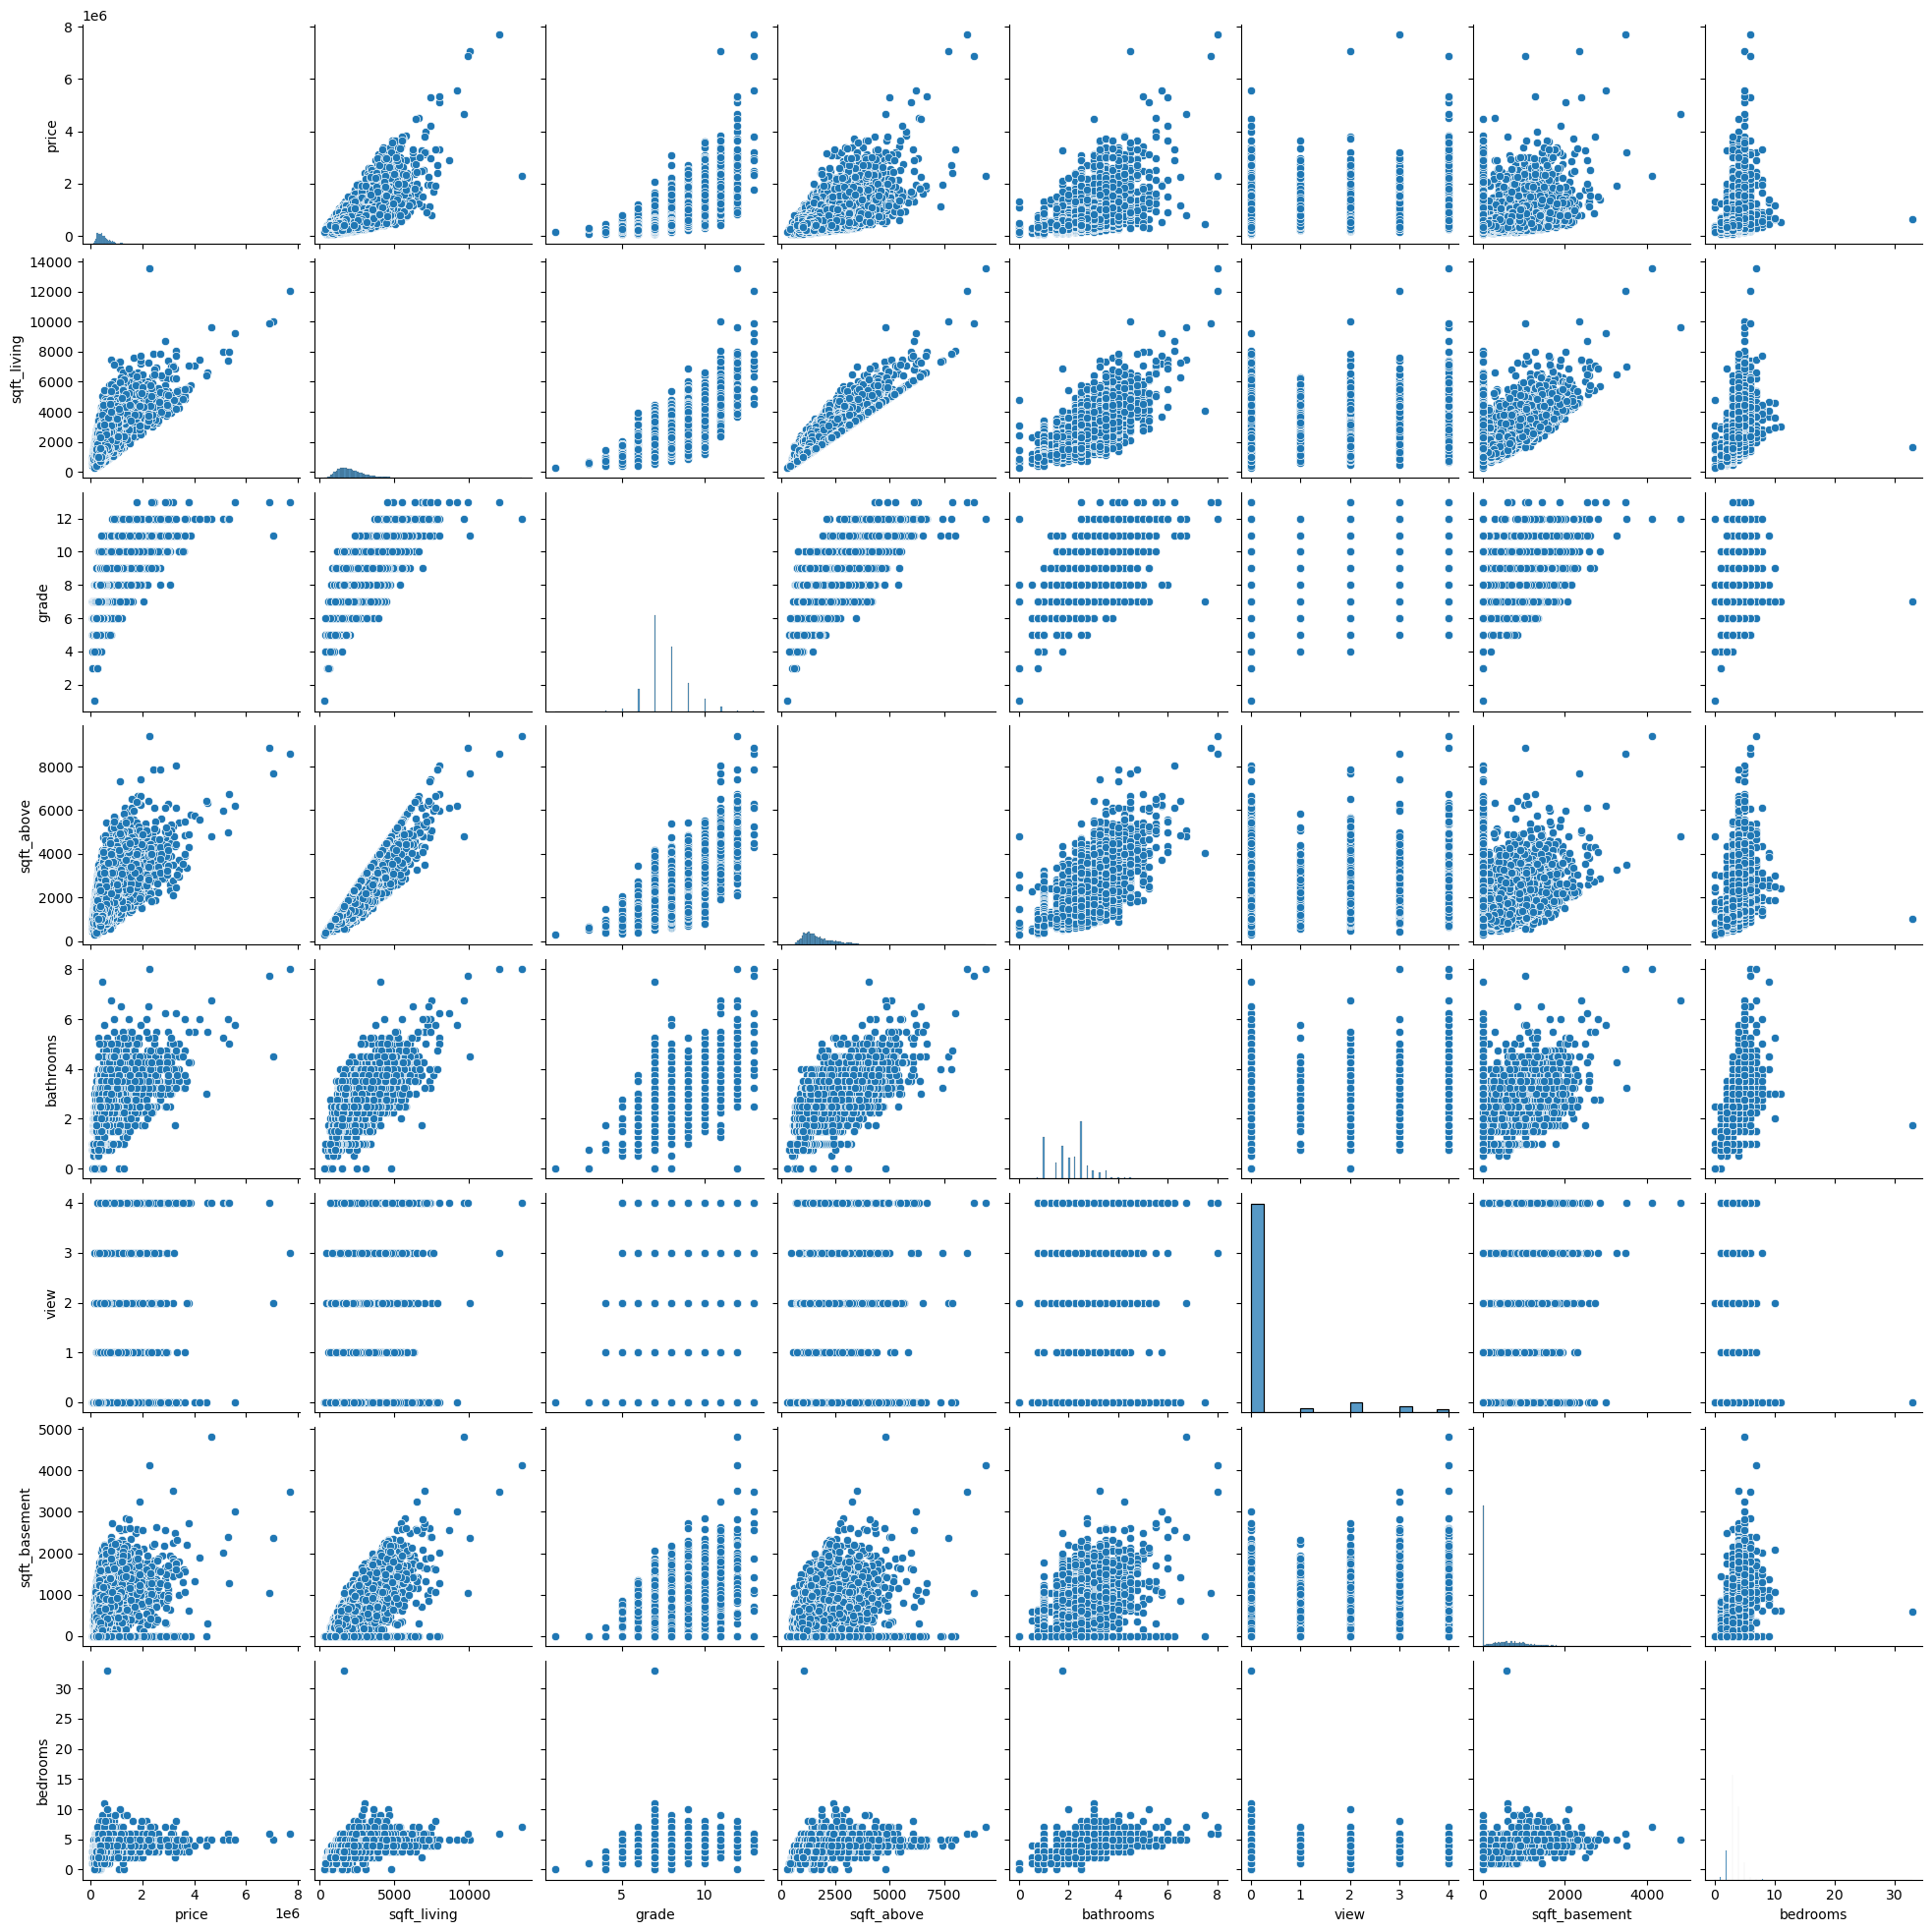

In [74]:
sns.pairplot(df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']])
plt.show()

# 2. Write a paragraph selecting the most important features (feature selection). 

In the process of feature selection for predicting house prices, the correlation heatmap revealed several key features strongly associated with the target variable. Notably, square footage of living space ('sqft_living') exhibited a high positive correlation of 0.7 with house prices, indicating that larger living spaces tend to command higher prices. Similarly, the grade of the house ('grade') and the square footage above ground level ('sqft_above') displayed substantial correlations of 0.67 and 0.61, respectively. The number of bathrooms ('bathrooms') and the presence of a view ('view') also demonstrated meaningful correlations at 0.53 and 0.4, respectively. Additionally, the square footage of the basement ('sqft_basement') and the number of bedrooms ('bedrooms') exhibited moderate correlations of 0.32 and 0.31. These findings suggest that these features are influential in determining house prices and should be prioritized during model training.

# 3. Split your dataset into a training set and a testing set. 

**Since the feature with the highest correlation with the price is the 'sqft_living' we will use it for the linear regression

In [117]:
X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 1)
X_test shape: (4323, 1)
y_train shape: (17290,)
y_test shape: (4323,)


# 4. Apply linear regression to your training set. 

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

# 5. Plot the linear regression. 

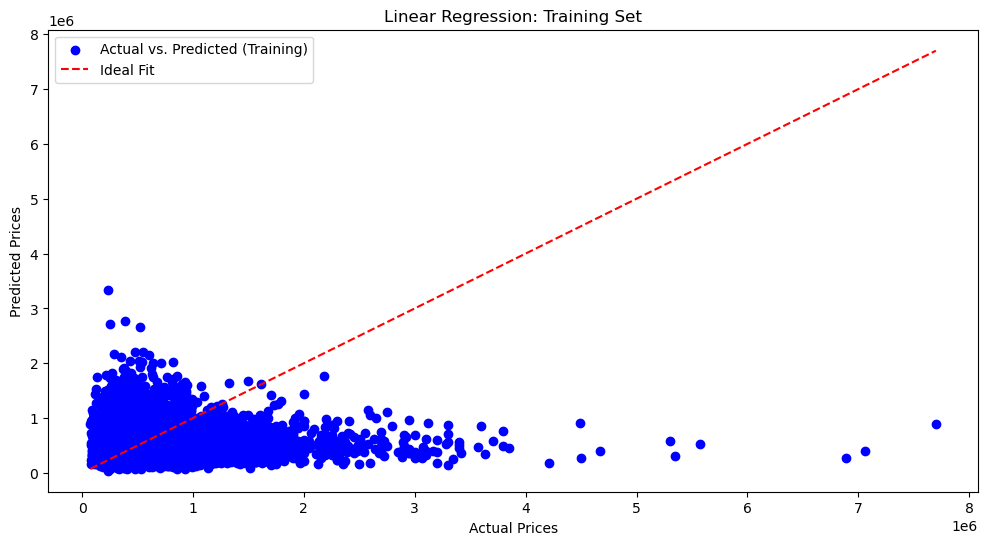

In [116]:
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Ideal Fit')
plt.title('Linear Regression: Training Set')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# 6. Measure the performance of linear regression using the testing set. 

In [122]:
y_test_pred = model.predict(X_test)

print("\nTesting Set Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("R-squared (R2):", r2_score(y_test, y_test_pred))


Testing Set Performance:
Mean Squared Error (MSE): 76484977061.77612
R-squared (R2): 0.49406905389089006


The testing set performance metrics reveal that the linear regression model, trained primarily on the 'sqft_living' feature, provides a reasonable but not exceptionally accurate prediction of house prices. The relatively high MSE suggests that there are considerable variations in the predicted prices compared to the actual prices in the testing set. The R-squared value, although indicating a moderate level of explanatory power, implies that there are additional factors influencing house prices that are not considered in the current model. 

# 7. Apply multiple-linear regression and compare it to the linear model. 

In [129]:
X_multi = df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']]
y_multi = df['price']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()

model_multi.fit(X_train_multi, y_train_multi)

y_train_pred_multi = model_multi.predict(X_train_multi)

print("Multiple Linear Regression - Training Set Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_train_multi, y_train_pred_multi))
print("R-squared (R2):", r2_score(y_train_multi, y_train_pred_multi))

y_test_pred_multi = model_multi.predict(X_test_multi)

print("\nMultiple Linear Regression - Testing Set Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_multi, y_test_pred_multi))
print("R-squared (R2):", r2_score(y_test_multi, y_test_pred_multi))

Multiple Linear Regression - Training Set Performance:
Mean Squared Error (MSE): 55033518240.5569
R-squared (R2): 0.5787669179186591

Multiple Linear Regression - Testing Set Performance:
Mean Squared Error (MSE): 62927691700.559105
R-squared (R2): 0.5837474518321188


The MSE values for both the training and testing sets are in the range of billions. MSE measures the average squared difference between predicted and actual values, with lower values indicating better model performance. The relatively high MSE suggests that there is still room for improvement, and the model might not be capturing all the variance in the target variable.
The R-squared values for both the training and testing sets are around 0.58. R-squared measures the proportion of the variance in the dependent variable explained by the independent variables. An R2 of 0.58 suggests that the model explains approximately 58% of the variability in the target variable. While this is a moderate level of explanatory power, there is still unexplained variance that the model does not capture.
The model provides a reasonable fit to the data, but there is potential for improvement.

# 8. Apply polynomial regression and compare it to linear and multilinear regression.

In [112]:
X_poly = df[['sqft_living', 'grade', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']]
y_poly = df['price']

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

degree = 1
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_train_poly, y_train_poly)
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

print("\nPolynomial Regression - Testing Set Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_poly, y_test_pred_poly))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_poly, y_test_pred_poly))
print("R-squared (R2):", r2_score(y_test_poly, y_test_pred_poly))


Polynomial Regression - Testing Set Performance:
Mean Squared Error (MSE): 62927691700.55899
R-squared (R2): 0.5837474518321195


The MSE value is consistent with the multiple linear regression model, indicating a similar level of prediction error. The model is, on average, off by a square root of the MSE (approximately 250,952 USD in this case).
The R-squared value is also similar to the multiple linear regression model, suggesting that both models explain approximately 58% of the variability in the target variable.
The polynomial regression model may not be providing a substantial advantage over the simpler multiple linear regression model.